Problem Statement: Analysing which model is the most suitable for predicting factors of heart disease and hence analysing which factor is the best at predicting presence of heart disease


# 1. Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
heart = pd.read_csv('heart.csv')

# 2. Understanding Data

## Heading and first few rows

In [2]:
heart.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Statistical description

In [3]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Info about dataset


### Checking for NULL values

In [4]:
info = heart.info()
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


We do not have missing values :)

### What each column means

In [5]:
information = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","output class [1: heart disease, 0: Normal"]



for i in range(len(information)-1):
    print(heart.columns[i]+":\t\t\t"+information[i])


Age:			age
Sex:			1: male, 0: female
ChestPainType:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
RestingBP:			resting blood pressure
Cholesterol:			 serum cholestoral in mg/dl
FastingBS:			fasting blood sugar > 120 mg/dl
RestingECG:			resting electrocardiographic results (values 0,1,2)
MaxHR:			 maximum heart rate achieved
ExerciseAngina:			exercise induced angina
Oldpeak:			oldpeak = ST depression induced by exercise relative to rest
ST_Slope:			the slope of the peak exercise ST segment


# 3. Exploratory Data Analysis

##Correlation between the data

Correlation between presence of heart disease and the presence of the following factors

In [6]:
print(heart.corr()["HeartDisease"].abs().sort_values(ascending=False))

HeartDisease    1.000000
Oldpeak         0.403951
MaxHR           0.400421
Age             0.282039
FastingBS       0.267291
Cholesterol     0.232741
RestingBP       0.107589
Name: HeartDisease, dtype: float64


<ipython-input-6-d68a867f467c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(heart.corr()["HeartDisease"].abs().sort_values(ascending=False))


From here we can see that resting blood pressure has the lease correlation to Heart Disease

## Diagramatical Analysis

In [7]:
heart["HeartDisease"].unique()

array([0, 1])

1    508
0    410
Name: HeartDisease, dtype: int64


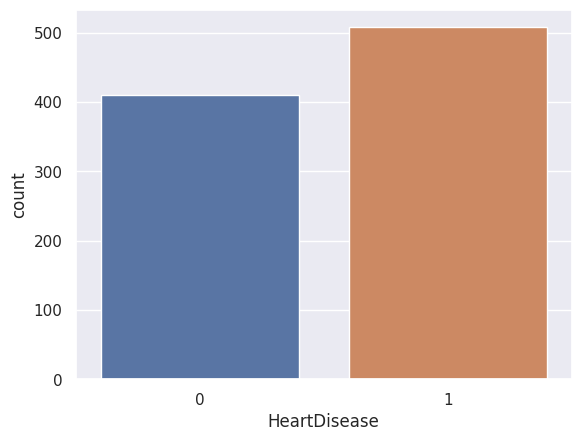

In [8]:
y = heart["HeartDisease"]


sb.countplot(x= 'HeartDisease',data = heart)


target_temp = heart.HeartDisease.value_counts()

print(target_temp)

In [9]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/918,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/918,2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

Percentage of patience without heart problems: 44.66
Percentage of patience with heart problems: 55.34


### Analysing Sex feature

In [10]:
heart["Sex"].unique()

array(['M', 'F'], dtype=object)

<Axes: xlabel='count', ylabel='Sex'>

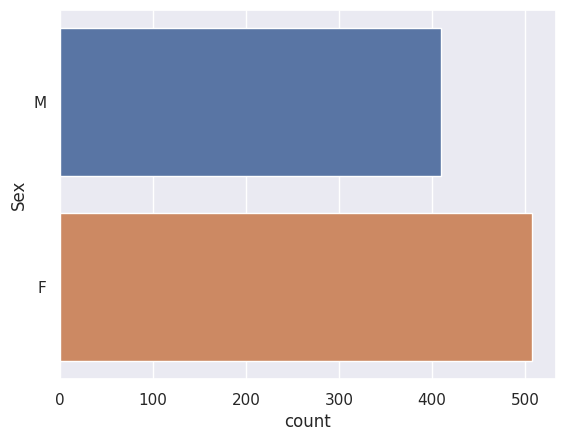

In [11]:
sb.countplot(data = heart["Sex"],y = y)

Here we notice that Females are more likely to have heart problems.

###Analysing Chest Pain Type feature

In [12]:
heart["ChestPainType"].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

<Axes: xlabel='ChestPainType', ylabel='count'>

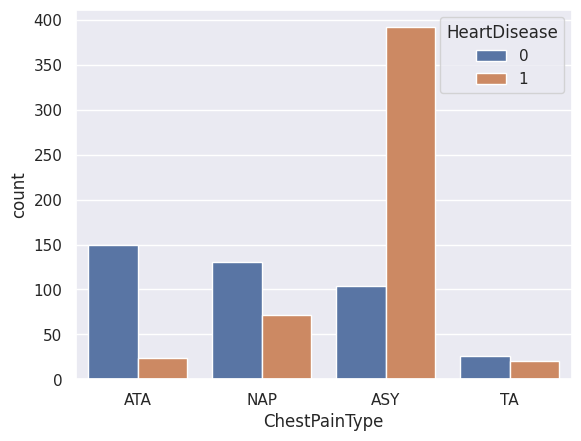

In [13]:
sb.countplot(x='ChestPainType', hue = y, data = heart)

Here we can see that those with Asymptomatic chest pain are most likely to have heart problems while those with typcial angina is least likely to have heart problems.


### Analysing FastingBS Type feature

In [45]:
heart["FastingBS"].unique()

array([0, 1])

<Axes: xlabel='FastingBS', ylabel='count'>

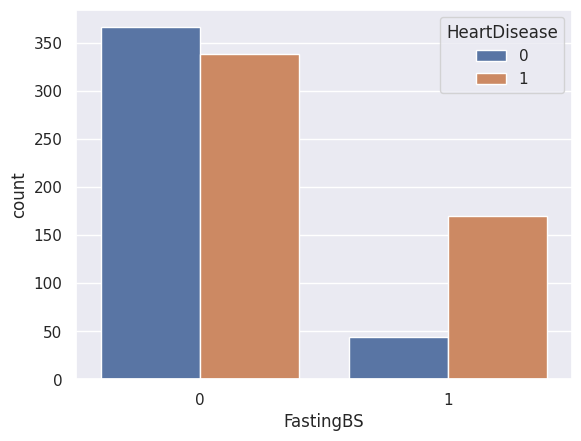

In [15]:
sb.countplot(x= 'FastingBS',hue= y, data = heart)

Here we can see that if your fasting blood sugar is > 120 mg/dl, you are less likely to have heart problems

### Analysing the RestingECG type feature

In [16]:
heart["RestingECG"].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

<Axes: xlabel='RestingECG', ylabel='count'>

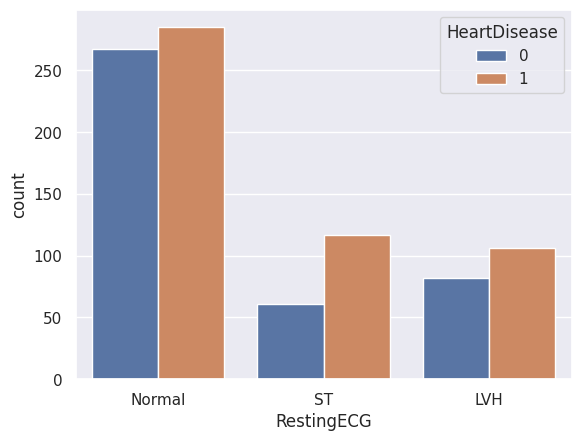

In [17]:
sb.countplot(x='RestingECG', hue = y, data = heart)

Here we can see that those who have ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) are more likely to have heart disease

###Analysing the ExerciseAngina type feature

In [18]:
heart["ExerciseAngina"].unique()

array(['N', 'Y'], dtype=object)

<Axes: xlabel='ExerciseAngina', ylabel='count'>

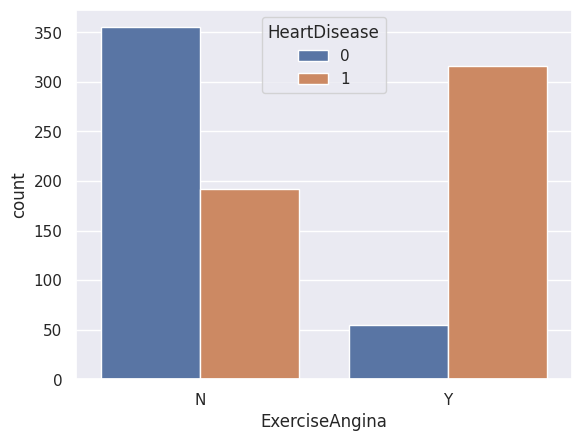

In [19]:
sb.countplot(x='ExerciseAngina', hue = y, data = heart)

Here we can see that if you have exercise induced angina you are more likely to get heart disease.

###Analysing ST_Slope feature

In [20]:
heart["ST_Slope"].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

<Axes: xlabel='ST_Slope', ylabel='count'>

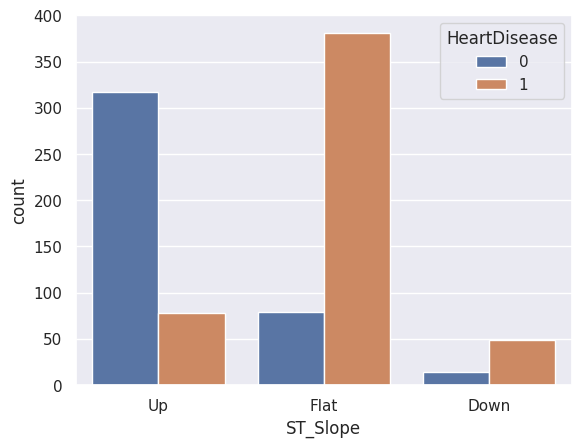

In [21]:
sb.countplot(x='ST_Slope', hue = y, data = heart)

Here we can see that if the slope of the peak exercise ST segment is flat there is a higher chance to get heart disease.

# 4. Decision Tree 



## Age and Sex

## Plot

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 10000x5000 with 0 Axes>

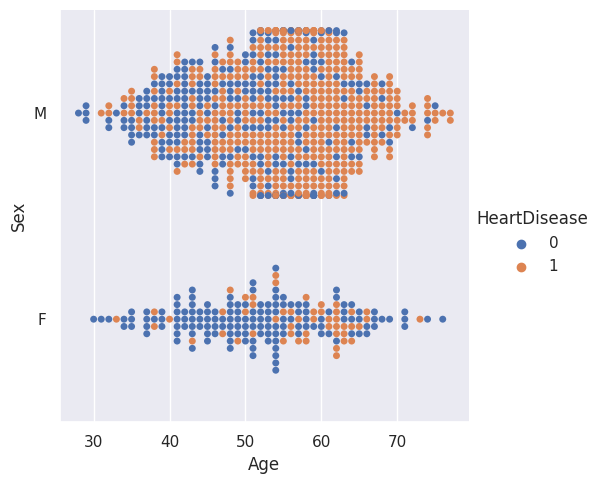

In [22]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Recall the Legendary-Total Dataset
HD = pd.DataFrame(heart['HeartDisease'])   # Response
Age = pd.DataFrame(heart['Age'])       # Predictor
Sex = pd.DataFrame(heart['Sex'])

X_train, X_test, y_train, y_test = train_test_split(Age, HD, test_size = 0.20)

joint = pd.concat([X_train, y_train], axis = 1).reindex(X_train.index)

f = plt.figure(figsize=(100, 50))
#sb.swarmplot(x = "Age", y = "HeartDisease", data = joint, orient = "h")

sb.catplot(data=heart, x="Age", y="Sex", hue="HeartDisease", kind="swarm")

#### Tree Plot

[Text(0.5, 0.875, 'HeartDisease <= 55.5\ngini = 0.49\nsamples = 734\nvalue = [315, 419]\nclass = True'),
 Text(0.25, 0.625, 'HeartDisease <= 45.5\ngini = 0.496\nsamples = 400\nvalue = [217, 183]\nclass = False'),
 Text(0.125, 0.375, 'HeartDisease <= 44.5\ngini = 0.457\nsamples = 153\nvalue = [99, 54]\nclass = False'),
 Text(0.0625, 0.125, 'gini = 0.466\nsamples = 141\nvalue = [89, 52]\nclass = False'),
 Text(0.1875, 0.125, 'gini = 0.278\nsamples = 12\nvalue = [10, 2]\nclass = False'),
 Text(0.375, 0.375, 'HeartDisease <= 47.5\ngini = 0.499\nsamples = 247\nvalue = [118, 129]\nclass = True'),
 Text(0.3125, 0.125, 'gini = 0.48\nsamples = 30\nvalue = [12, 18]\nclass = True'),
 Text(0.4375, 0.125, 'gini = 0.5\nsamples = 217\nvalue = [106, 111]\nclass = True'),
 Text(0.75, 0.625, 'HeartDisease <= 59.5\ngini = 0.415\nsamples = 334\nvalue = [98, 236]\nclass = True'),
 Text(0.625, 0.375, 'HeartDisease <= 58.5\ngini = 0.453\nsamples = 121\nvalue = [42, 79]\nclass = True'),
 Text(0.5625, 0.125, '

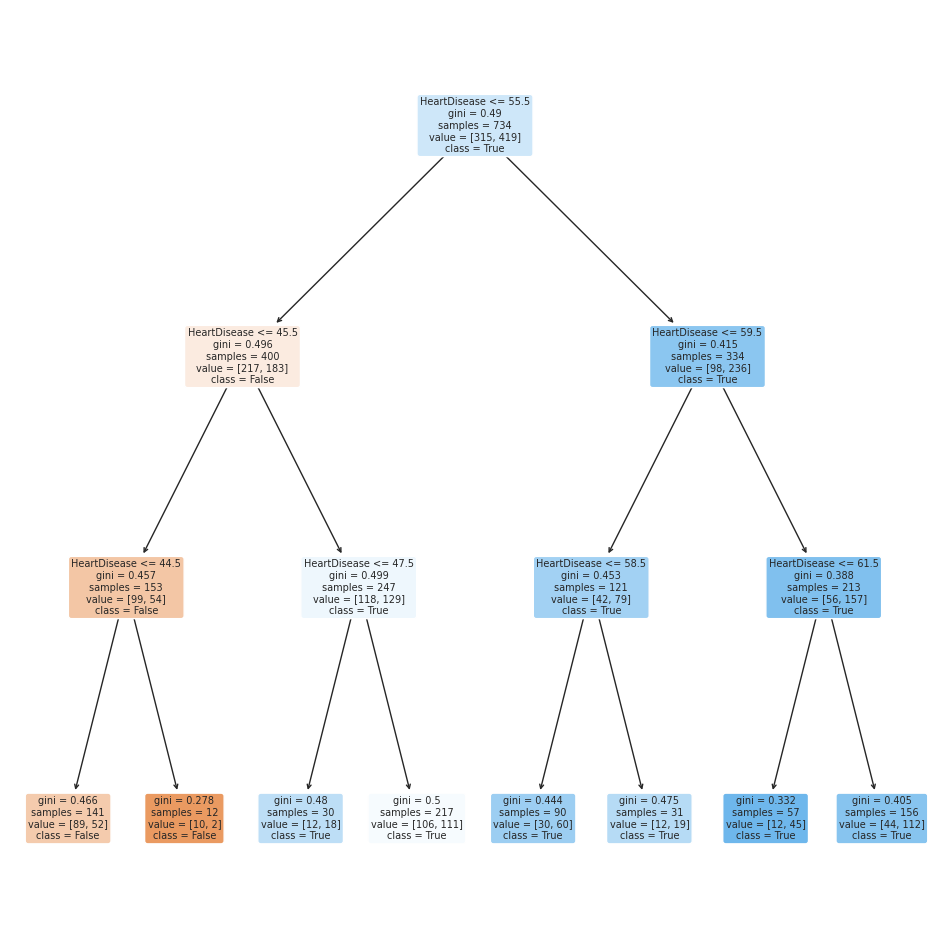

In [23]:
from sklearn.tree import plot_tree
tree1 = DecisionTreeClassifier(max_depth = 3)
tree1.fit(X_train,y_train)


f = plt.figure(figsize=(12,12))
plot_tree(tree1, filled=True, rounded=True, 
          feature_names=["HeartDisease"], 
          class_names=["False","True"])



#### Prediction Accuracy

In [24]:
from sklearn.metrics import accuracy_score

Y_pred_dt = tree1.predict(X_test)
score_dt = round(accuracy_score(Y_pred_dt,y_test)*100,2)


print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 64.13 %


#### Confusion Matrix

Text(0.5, 1.0, 'Test Set for Age')

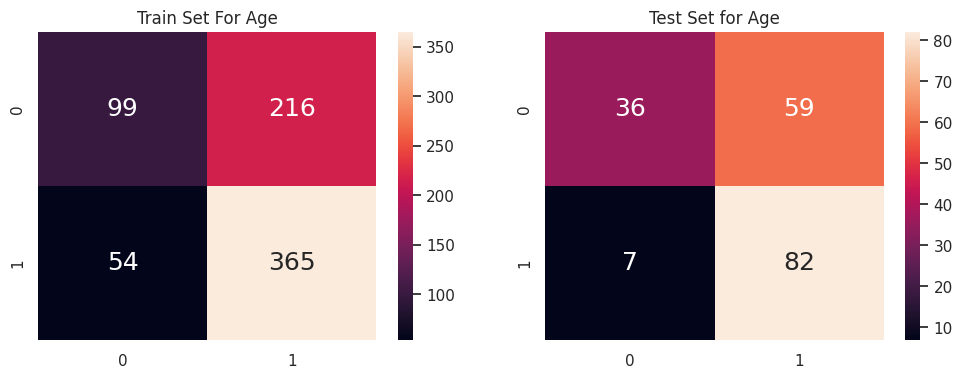

In [25]:
y_train_pred1 = tree1.predict(X_train)
y_test_pred1 = tree1.predict(X_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred1),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_title("Train Set For Age")

sb.heatmap(confusion_matrix(y_test, y_test_pred1), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title("Test Set for Age")




#### Classification Accuracy

In [26]:
def values(y_true,y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = cm[0][0]
    fn = cm[1][0]
    tp = cm[1][1]
    fp = cm[0][1]
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    tnr = tn/(tn+fp)
    print("TPR \t:", tpr)
    print("FPR \t:", fpr)
    print("TNR \t", tnr)


print("Model 1")
print("Classification Accuracy in train data \t:",tree1.score(X_train, y_train))
print("Classification Accuracy in test data \t:",tree1.score(X_test, y_test))
print("TPR & FPR for train")
values(y_train,y_train_pred1)
print('')
print("TPR & FPR for test")
values(y_test, y_test_pred1)
print('')


Model 1
Classification Accuracy in train data 	: 0.6321525885558583
Classification Accuracy in test data 	: 0.6413043478260869
TPR & FPR for train
TPR 	: 0.8711217183770883
FPR 	: 0.6857142857142857
TNR 	 0.3142857142857143

TPR & FPR for test
TPR 	: 0.9213483146067416
FPR 	: 0.6210526315789474
TNR 	 0.37894736842105264



##Resting Blood Pressure 

#### Plot

<Axes: xlabel='RestingBP', ylabel='HeartDisease'>

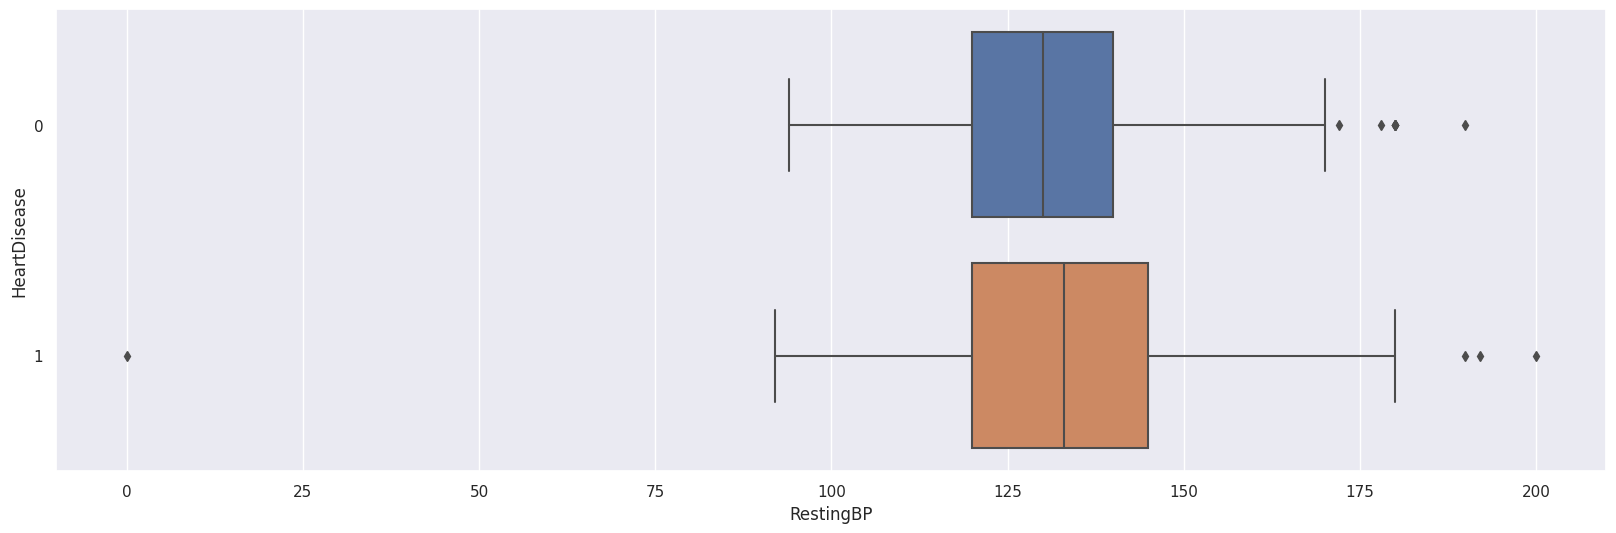

In [27]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Recall the Legendary-Total Dataset
HD = pd.DataFrame(heart['HeartDisease'])   # Response
RestingBP = pd.DataFrame(heart['RestingBP'])       # Predictor

X_trainBP, X_testBP, y_trainBP, y_testBP = train_test_split(RestingBP, HD, test_size = 0.20)

joint = pd.concat([X_trainBP, y_trainBP], axis = 1).reindex(X_trainBP.index)

f = plt.figure(figsize=(20, 6))
sb.boxplot(x = "RestingBP", y = "HeartDisease", data = joint, orient = "h")

#### Tree Plot


[Text(0.5, 0.875, 'HeartDisease <= 140.5\ngini = 0.496\nsamples = 734\nvalue = [335, 399]\nclass = True'),
 Text(0.25, 0.625, 'HeartDisease <= 97.0\ngini = 0.5\nsamples = 553\nvalue = [275, 278]\nclass = True'),
 Text(0.125, 0.375, 'HeartDisease <= 94.5\ngini = 0.32\nsamples = 10\nvalue = [2, 8]\nclass = True'),
 Text(0.0625, 0.125, 'gini = 0.5\nsamples = 4\nvalue = [2, 2]\nclass = False'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = True'),
 Text(0.375, 0.375, 'HeartDisease <= 109.0\ngini = 0.5\nsamples = 543\nvalue = [273, 270]\nclass = False'),
 Text(0.3125, 0.125, 'gini = 0.478\nsamples = 33\nvalue = [20, 13]\nclass = False'),
 Text(0.4375, 0.125, 'gini = 0.5\nsamples = 510\nvalue = [253, 257]\nclass = True'),
 Text(0.75, 0.625, 'HeartDisease <= 147.0\ngini = 0.443\nsamples = 181\nvalue = [60, 121]\nclass = True'),
 Text(0.625, 0.375, 'HeartDisease <= 142.5\ngini = 0.326\nsamples = 39\nvalue = [8, 31]\nclass = True'),
 Text(0.5625, 0.125, 'gini = 0.444\ns

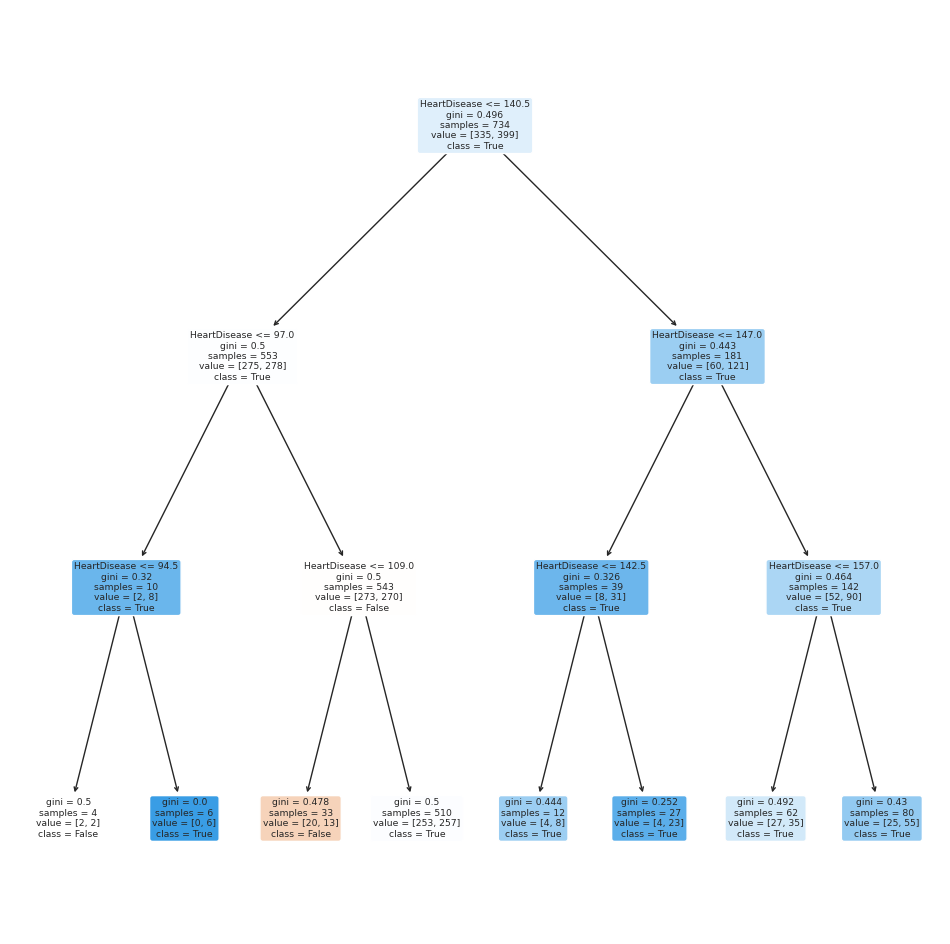

In [28]:
from sklearn.tree import plot_tree
tree2 = DecisionTreeClassifier(max_depth = 3)
tree2.fit(X_trainBP,y_trainBP)


f = plt.figure(figsize=(12,12))
plot_tree(tree2, filled=True, rounded=True, 
          feature_names=["HeartDisease"], 
          class_names=["False","True"])

#### Prediction Accuracy

In [29]:
from sklearn.metrics import accuracy_score

Y_pred_dt = tree2.predict(X_testBP)
score_dt = round(accuracy_score(Y_pred_dt,y_testBP)*100,2)


print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 60.33 %


### Confusion Matrix

Text(0.5, 1.0, 'Test Set')

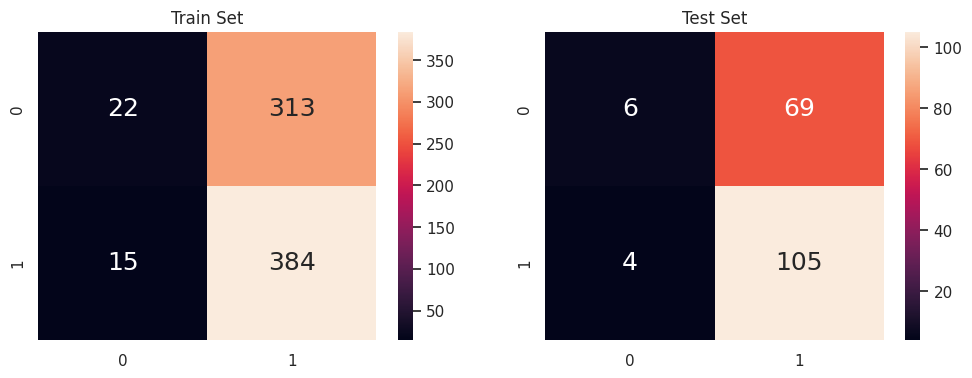

In [30]:
y_train_pred1 = tree2.predict(X_trainBP)
y_test_pred1 = tree2.predict(X_testBP)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_trainBP, y_train_pred1),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_title("Train Set")

sb.heatmap(confusion_matrix(y_testBP, y_test_pred1), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title("Test Set")

### Classification Accuracy

In [31]:
def values(y_true,y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = cm[0][0]
    fn = cm[1][0]
    tp = cm[1][1]
    fp = cm[0][1]
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    tnr = tn/(tn+fp)
    print("TPR \t:", tpr)
    print("FPR \t:", fpr)
    print("TNR \t", tnr)


print("Model 1")
print("Classification Accuracy in train data \t:",tree2.score(X_trainBP, y_trainBP))
print("Classification Accuracy in test data \t:",tree2.score(X_testBP, y_testBP))
print("TPR & FPR for train")
values(y_trainBP,y_train_pred1)
print('')
print("TPR & FPR for test")
values(y_testBP, y_test_pred1)
print('')


Model 1
Classification Accuracy in train data 	: 0.553133514986376
Classification Accuracy in test data 	: 0.6032608695652174
TPR & FPR for train
TPR 	: 0.9624060150375939
FPR 	: 0.9343283582089552
TNR 	 0.06567164179104477

TPR & FPR for test
TPR 	: 0.963302752293578
FPR 	: 0.92
TNR 	 0.08



## Cholestrol 

### Plot

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 12.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Cholesterol', ylabel='HeartDisease'>

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 21.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


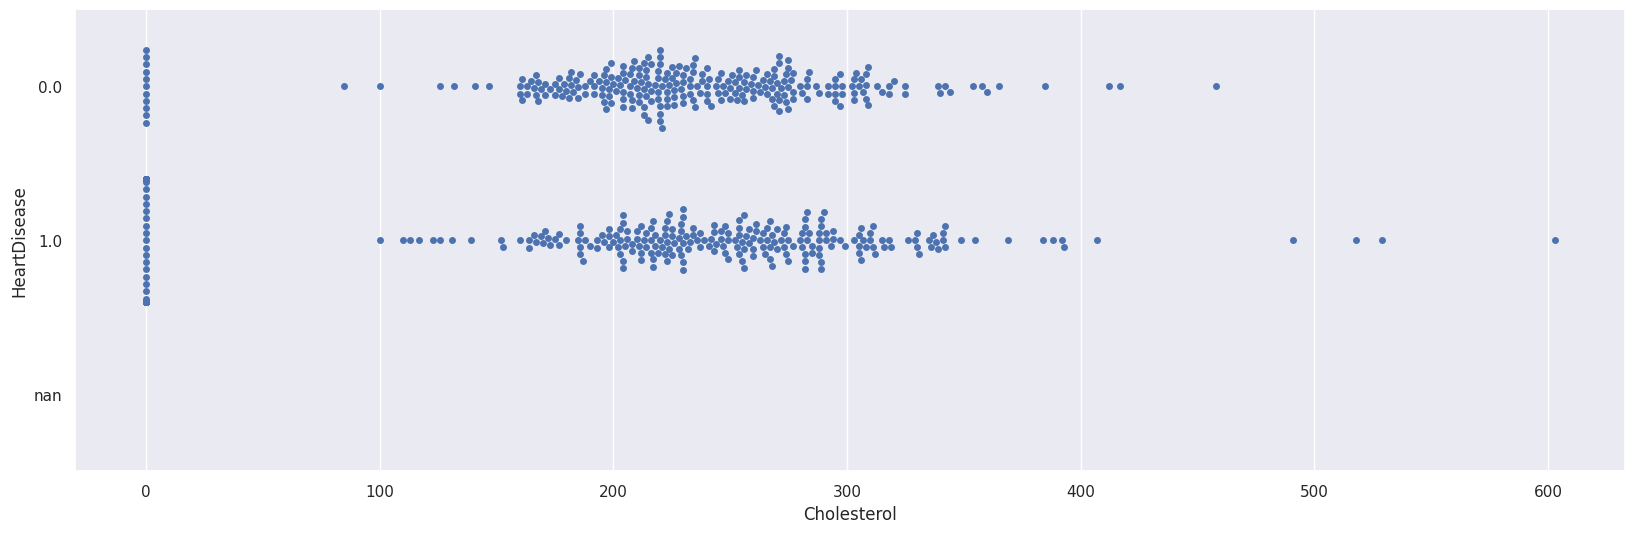

In [32]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Recall the Legendary-Total Dataset

HD = pd.DataFrame(heart['HeartDisease'])   # Response
Cholesterol = pd.DataFrame(heart['Cholesterol'])       # Predictor

X_trainC, X_testC, y_trainC, y_testC = train_test_split(Cholesterol, HD, test_size = 0.20)

joint = pd.concat([X_trainC, y_trainC], axis = 1).reindex(X_train.index)

f = plt.figure(figsize=(20, 6))

sb.swarmplot(x = "Cholesterol", y = "HeartDisease", data = joint, orient = "h")

### Tree Plot

[Text(0.35, 0.9, 'HeartDisease <= 124.5\ngini = 0.498\nsamples = 734\nvalue = [346, 388]\nclass = True'),
 Text(0.1, 0.7, 'HeartDisease <= 42.5\ngini = 0.204\nsamples = 130\nvalue = [15, 115]\nclass = True'),
 Text(0.05, 0.5, 'gini = 0.189\nsamples = 123\nvalue = [13, 110]\nclass = True'),
 Text(0.15, 0.5, 'HeartDisease <= 105.0\ngini = 0.408\nsamples = 7\nvalue = [2, 5]\nclass = True'),
 Text(0.1, 0.3, 'HeartDisease <= 92.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = False'),
 Text(0.05, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = False'),
 Text(0.15, 0.1, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = False'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = True'),
 Text(0.6, 0.7, 'HeartDisease <= 278.0\ngini = 0.495\nsamples = 604\nvalue = [331, 273]\nclass = False'),
 Text(0.4, 0.5, 'HeartDisease <= 215.5\ngini = 0.484\nsamples = 454\nvalue = [267, 187]\nclass = False'),
 Text(0.3, 0.3, 'HeartDisease <= 214.5\ngini = 0.461\nsamples = 186\nval

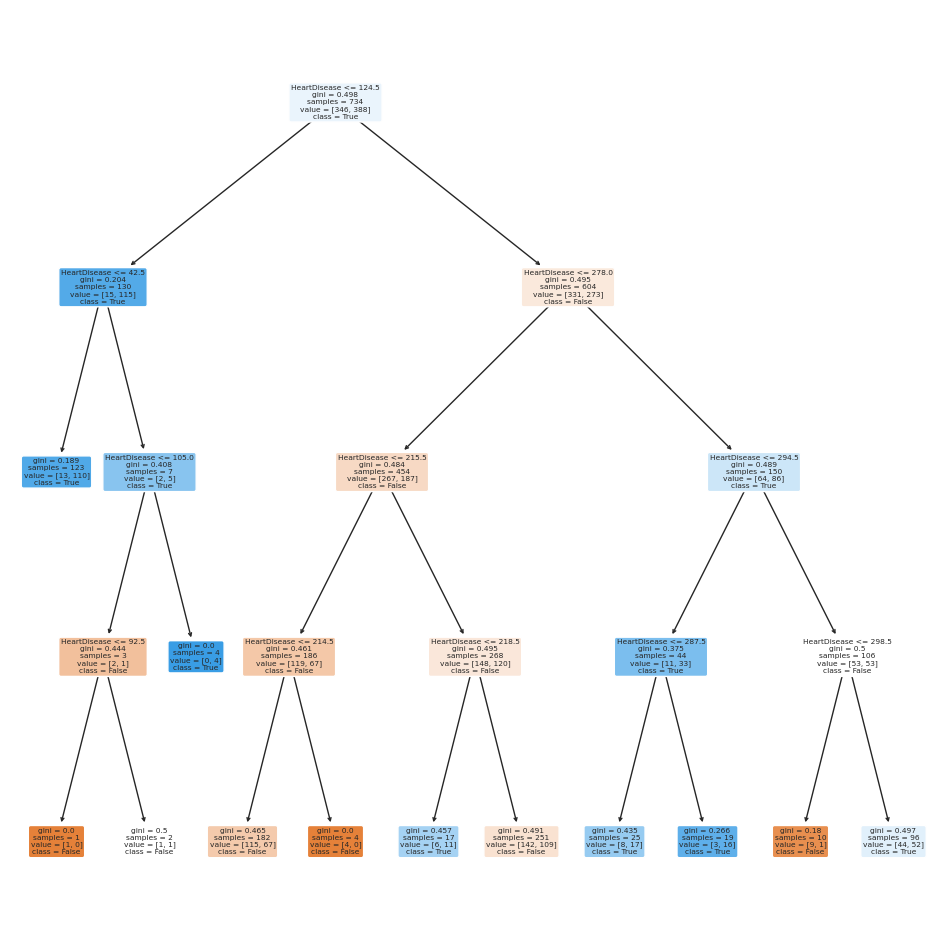

In [33]:
from sklearn.tree import plot_tree
tree3 = DecisionTreeClassifier(max_depth = 4)
tree3.fit(X_trainC,y_trainC)


f = plt.figure(figsize=(12,12))
plot_tree(tree3, filled=True, rounded=True, 
          feature_names=["HeartDisease"], 
          class_names=["False","True"])

###Prediction Accuracy


In [34]:
from sklearn.metrics import accuracy_score

Y_pred_dt = tree3.predict(X_testC)
score_dt = round(accuracy_score(Y_pred_dt,y_testC)*100,2)


print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 57.61 %


### Confusion Matrix

Text(0.5, 1.0, 'Test Set')

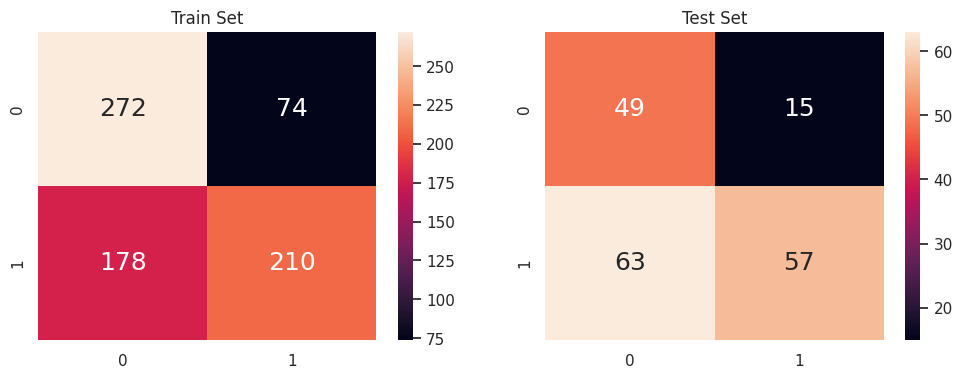

In [35]:
y_train_pred1 = tree3.predict(X_trainC)
y_test_pred1 = tree3.predict(X_testC)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_trainC, y_train_pred1),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_title("Train Set")

sb.heatmap(confusion_matrix(y_testC, y_test_pred1), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title("Test Set")

### Classification Accuracy

In [36]:
def values(y_true,y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = cm[0][0]
    fn = cm[1][0]
    tp = cm[1][1]
    fp = cm[0][1]
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    tnr = tn/(tn+fp)
    print("TPR \t:", tpr)
    print("FPR \t:", fpr)
    print("TNR \t", tnr)


print("Model 1")
print("Classification Accuracy in train data \t:",tree3.score(X_trainC, y_trainC))
print("Classification Accuracy in test data \t:",tree3.score(X_testC, y_testC))
print("TPR & FPR for train")
values(y_trainC,y_train_pred1)
print('')
print("TPR & FPR for test")
values(y_testC, y_test_pred1)
print('')


Model 1
Classification Accuracy in train data 	: 0.6566757493188011
Classification Accuracy in test data 	: 0.5760869565217391
TPR & FPR for train
TPR 	: 0.5412371134020618
FPR 	: 0.2138728323699422
TNR 	 0.7861271676300579

TPR & FPR for test
TPR 	: 0.475
FPR 	: 0.234375
TNR 	 0.765625



## Max Heart Rate

#### Plot

<Axes: xlabel='MaxHR', ylabel='HeartDisease'>

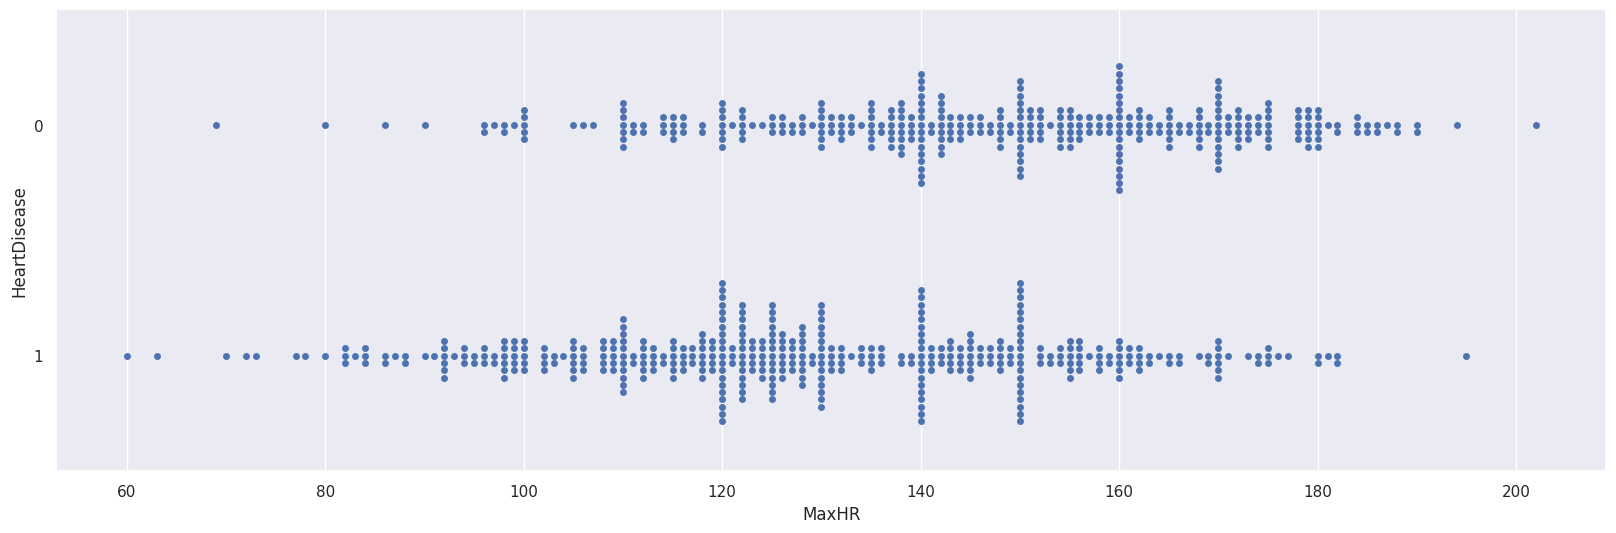

In [37]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Recall the Legendary-Total Dataset
HD = pd.DataFrame(heart['HeartDisease'])   # Response
MaxHR = pd.DataFrame(heart['MaxHR'])       # Predictor

X_trainHR, X_testHR, y_trainHR, y_testHR = train_test_split(MaxHR, HD, test_size = 0.20)

joint = pd.concat([X_trainHR, y_trainHR], axis = 1).reindex(X_trainHR.index)

f = plt.figure(figsize=(20, 6))
sb.swarmplot(x = "MaxHR", y = "HeartDisease", data = joint, orient = "h")

#### Tree Plot

[Text(0.5, 0.875, 'HeartDisease <= 55.5\ngini = 0.49\nsamples = 734\nvalue = [315, 419]\nclass = True'),
 Text(0.25, 0.625, 'HeartDisease <= 45.5\ngini = 0.496\nsamples = 400\nvalue = [217, 183]\nclass = False'),
 Text(0.125, 0.375, 'HeartDisease <= 44.5\ngini = 0.457\nsamples = 153\nvalue = [99, 54]\nclass = False'),
 Text(0.0625, 0.125, 'gini = 0.466\nsamples = 141\nvalue = [89, 52]\nclass = False'),
 Text(0.1875, 0.125, 'gini = 0.278\nsamples = 12\nvalue = [10, 2]\nclass = False'),
 Text(0.375, 0.375, 'HeartDisease <= 47.5\ngini = 0.499\nsamples = 247\nvalue = [118, 129]\nclass = True'),
 Text(0.3125, 0.125, 'gini = 0.48\nsamples = 30\nvalue = [12, 18]\nclass = True'),
 Text(0.4375, 0.125, 'gini = 0.5\nsamples = 217\nvalue = [106, 111]\nclass = True'),
 Text(0.75, 0.625, 'HeartDisease <= 59.5\ngini = 0.415\nsamples = 334\nvalue = [98, 236]\nclass = True'),
 Text(0.625, 0.375, 'HeartDisease <= 58.5\ngini = 0.453\nsamples = 121\nvalue = [42, 79]\nclass = True'),
 Text(0.5625, 0.125, '

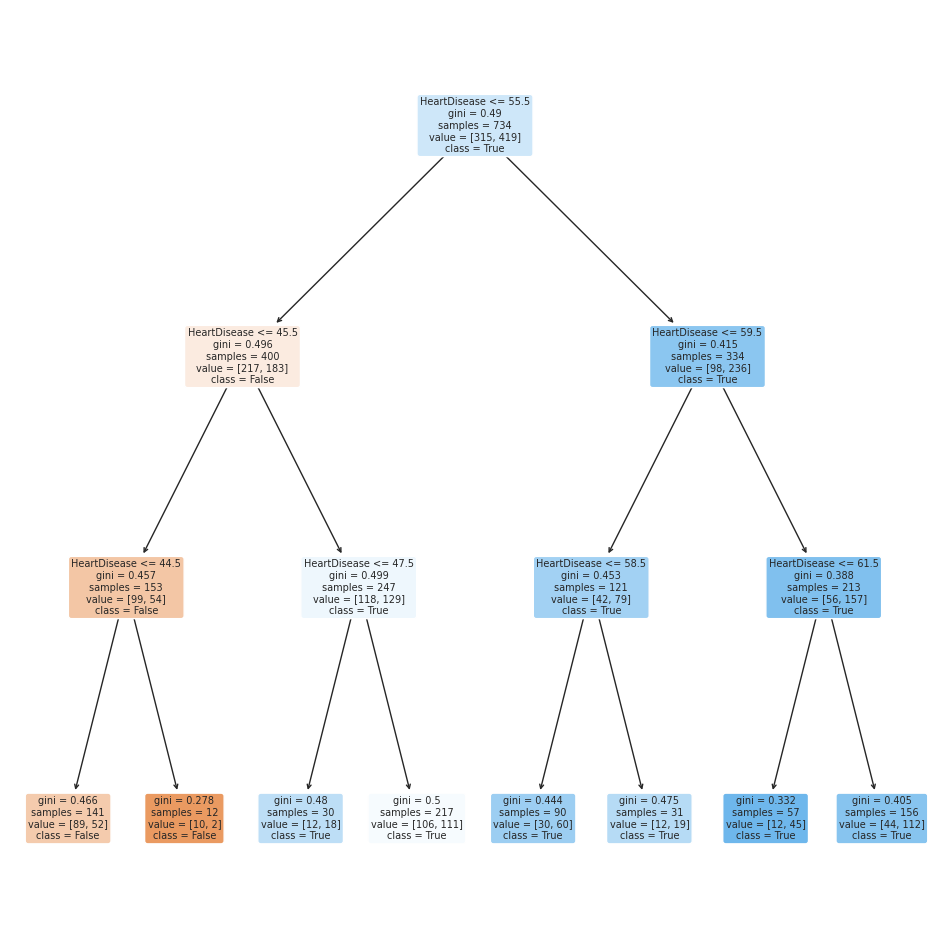

In [38]:
from sklearn.tree import plot_tree
tree4 = DecisionTreeClassifier(max_depth = 4)
tree4.fit(X_trainHR,y_trainHR)


f = plt.figure(figsize=(12,12))
plot_tree(tree1, filled=True, rounded=True, 
          feature_names=["HeartDisease"], 
          class_names=["False","True"])

####Prediction Accuracy

In [39]:
from sklearn.metrics import accuracy_score

Y_pred_dt = tree4.predict(X_testHR)
score_dt = round(accuracy_score(Y_pred_dt,y_testHR)*100,2)


print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 70.65 %


#### Confusion Matrix

Text(0.5, 1.0, 'Test Set')

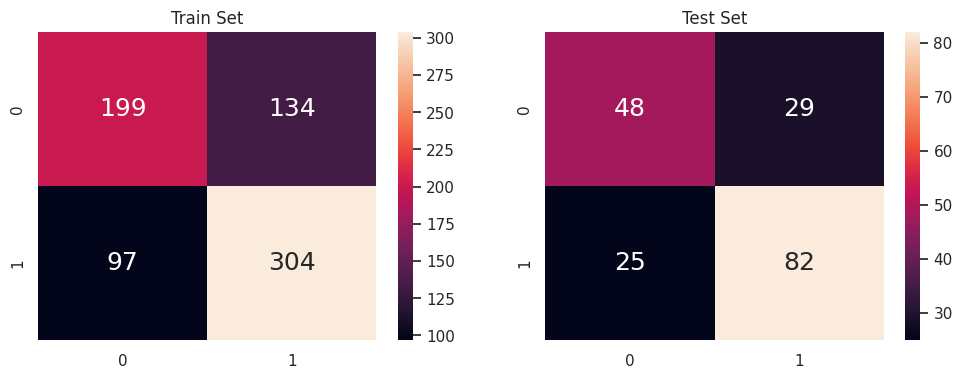

In [40]:
y_train_pred1 = tree4.predict(X_trainHR)
y_test_pred1 = tree4.predict(X_testHR)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_trainHR, y_train_pred1),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_title("Train Set")

sb.heatmap(confusion_matrix(y_testHR, y_test_pred1), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title("Test Set")

### Classification Accuracy

In [41]:
def values(y_true,y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = cm[0][0]
    fn = cm[1][0]
    tp = cm[1][1]
    fp = cm[0][1]
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    tnr = tn/(tn+fp)
    print("TPR \t:", tpr)
    print("FPR \t:", fpr)
    print("TNR \t", tnr)


print("Model 1")
print("Classification Accuracy in train data \t:",tree4.score(X_trainHR, y_train))
print("Classification Accuracy in test data \t:",tree4.score(X_testHR, y_test))
print("TPR & FPR for train")
values(y_trainHR,y_train_pred1)
print('')
print("TPR & FPR for test")
values(y_testHR, y_test_pred1)
print('')


Model 1
Classification Accuracy in train data 	: 0.5054495912806539
Classification Accuracy in test data 	: 0.4782608695652174
TPR & FPR for train
TPR 	: 0.7581047381546134
FPR 	: 0.4024024024024024
TNR 	 0.5975975975975976

TPR & FPR for test
TPR 	: 0.7663551401869159
FPR 	: 0.37662337662337664
TNR 	 0.6233766233766234



## Overall Accuracy


<Axes: xlabel='FastingBS', ylabel='count'>

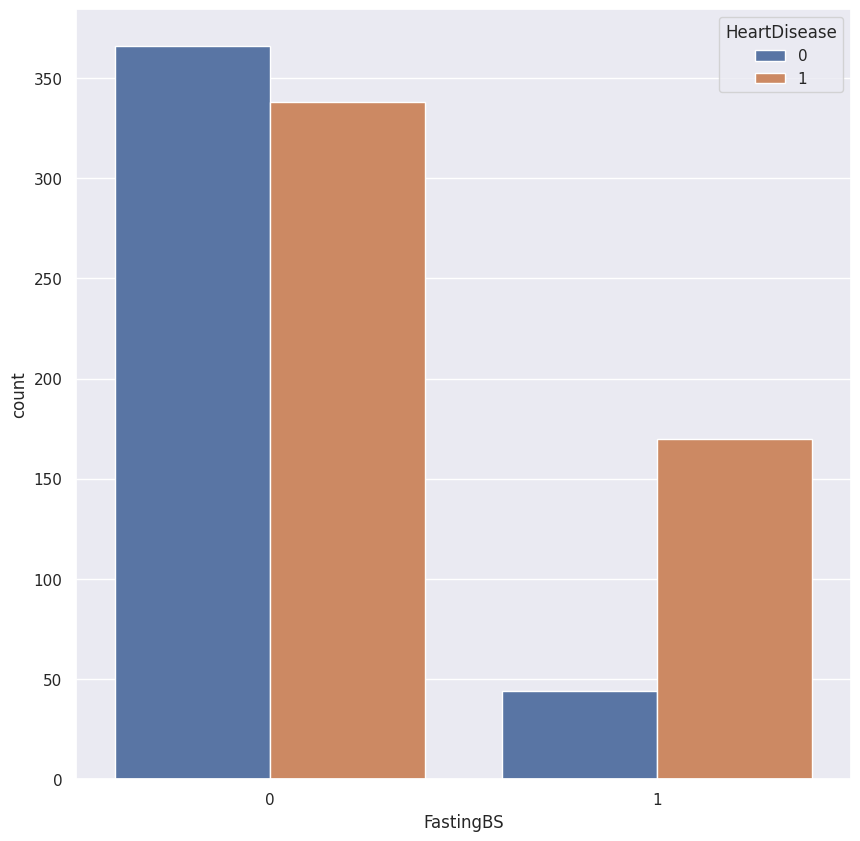

In [42]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Recall the Legendary-Total Dataset
HD = pd.DataFrame(heart['HeartDisease'])   # Response
Sex = pd.DataFrame(heart['Sex'])       # Predictor
Age = pd.DataFrame(heart['Age'])


X_train, X_test, y_train, y_test = train_test_split(Age, HD, test_size = 0.20)

joint = pd.concat([X_train, y_train], axis = 1).reindex(X_train.index)

f = plt.figure(figsize=(10, 10))
#sb.swarmplot(x = "Age", y = "HeartDisease", data = joint, orient = "h")

sb.countplot(x=heart["FastingBS"], hue=heart["HeartDisease"])

In [47]:
from sklearn.model_selection import train_test_split

predictorstree = heart.drop("HeartDisease",axis=1)
targettree = heart["HeartDisease"]

X_traintree,X_testtree,Y_traintree,Y_testtree = train_test_split(predictorstree,targettree,test_size=0.20,random_state=0)

In [55]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

max_accuracy = 0

# assume that X_traintree and X_testtree are pandas dataframes with categorical columns

# apply one-hot encoding to X_traintree
X_traintree_encoded = pd.get_dummies(X_traintree)

# apply one-hot encoding to X_testtree
X_testtree_encoded = pd.get_dummies(X_testtree)

# make sure that X_traintree_encoded and X_testtree_encoded have the same columns
X_traintree_encoded, X_testtree_encoded = X_traintree_encoded.align(X_testtree_encoded, join='outer', axis=1, fill_value=0)


best_x = x
for x in range(200):
    dt = DecisionTreeClassifier(random_state=best_x)
    dt.fit(X_traintree_encoded, Y_traintree)
    Y_pred_dt = dt.predict(X_testtree_encoded)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_testtree)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_traintree_encoded,Y_traintree)
Y_pred_dt = dt.predict(X_testtree_encoded)

In [57]:
score_dt = round(accuracy_score(Y_pred_dt,Y_testtree)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 75.54 %


# 5. Random Forest Model

###Max Heart Rate


In [56]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(50):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_trainHR,y_trainHR)
    Y_pred_rf = rf.predict(X_testHR)
    current_accuracy = round(accuracy_score(Y_pred_rf,y_testHR)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_trainHR,y_trainHR)
Y_pred_rf = rf.predict(X_testHR)

<ipython-input-56-535442427288>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_trainHR,y_trainHR)
<ipython-input-56-535442427288>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_trainHR,y_trainHR)
<ipython-input-56-535442427288>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_trainHR,y_trainHR)
<ipython-input-56-535442427288>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_trainHR,y_trainHR)
<ipython-input-56-535442427288>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

####Prediction Accuracy

In [58]:
score_rf = round(accuracy_score(Y_pred_rf,y_testHR)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 70.65 %


###Cholesterol

In [59]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(50):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_trainC,y_trainC)
    Y_pred_rf = rf.predict(X_testC)
    current_accuracy = round(accuracy_score(Y_pred_rf,y_testC)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_trainC,y_trainC)
Y_pred_rf = rf.predict(X_testC)

<ipython-input-59-411e1351c23a>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_trainC,y_trainC)
<ipython-input-59-411e1351c23a>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_trainC,y_trainC)
<ipython-input-59-411e1351c23a>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_trainC,y_trainC)
<ipython-input-59-411e1351c23a>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_trainC,y_trainC)
<ipython-input-59-411e1351c23a>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

####Prediction Accuracy

In [60]:
score_rf = round(accuracy_score(Y_pred_rf,y_testC)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 63.04 %


###Resting Blood Pressure

In [61]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(50):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_trainBP,y_trainBP)
    Y_pred_rf = rf.predict(X_testBP)
    current_accuracy = round(accuracy_score(Y_pred_rf,y_testBP)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_trainBP,y_trainBP)
Y_pred_rf = rf.predict(X_testBP)

<ipython-input-61-6abb85b8aabe>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_trainBP,y_trainBP)
<ipython-input-61-6abb85b8aabe>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_trainBP,y_trainBP)
<ipython-input-61-6abb85b8aabe>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_trainBP,y_trainBP)
<ipython-input-61-6abb85b8aabe>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_trainBP,y_trainBP)
<ipython-input-61-6abb85b8aabe>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

####Prediction Accuracy

In [62]:
score_rf = round(accuracy_score(Y_pred_rf,y_testC)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 55.98 %


###Age 

In [75]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(100):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,y_train)
Y_pred_rf = rf.predict(X_test)

<ipython-input-75-ae2378bcde35>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)
<ipython-input-75-ae2378bcde35>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)
<ipython-input-75-ae2378bcde35>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)
<ipython-input-75-ae2378bcde35>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)
<ipython-input-75-ae2378bcde35>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

####Prediction Accuracy

In [76]:
score_rf = round(accuracy_score(Y_pred_rf,y_testC)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 53.26 %


## Overall Accuracy

In [64]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(50):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_traintree_encoded,Y_traintree)
    Y_pred_rf = rf.predict(X_testtree_encoded)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_testtree)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_traintree_encoded,Y_traintree)
Y_pred_rf = rf.predict(X_testtree_encoded)

In [77]:
score_rf = round(accuracy_score(Y_pred_rf,Y_testtree)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 50.54 %


#XG Boost Model


## Max Heart Rate

In [65]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_trainHR, y_trainHR)

Y_pred_xgb = xgb_model.predict(X_testHR)

### Prediction Accuracy

In [66]:
score_xgb = round(accuracy_score(Y_pred_xgb,y_testHR)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 70.11 %


## Cholestrol


In [67]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_trainC, y_trainC)

Y_pred_xgb = xgb_model.predict(X_testC)


### Prediction Accuracy

In [68]:
score_xgb = round(accuracy_score(Y_pred_xgb,y_testC)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 61.41 %


## Resting Blood Pressure

In [69]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_trainBP, y_trainBP)

Y_pred_xgb = xgb_model.predict(X_testBP)

### Prediction Accuracy

In [70]:
score_xgb = round(accuracy_score(Y_pred_xgb,y_testBP)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 54.35 %


## Age

In [71]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

Y_pred_xgb = xgb_model.predict(X_test)

### Prediction Accuracy

In [72]:
score_xgb = round(accuracy_score(Y_pred_xgb,y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 58.15 %


## Overall Accuracy


In [73]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_traintree_encoded, Y_traintree)

Y_pred_xgb = xgb_model.predict(X_testtree_encoded)

In [74]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_testtree)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 84.78 %
